# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | LEMARCHANT HUGO - LEMH03039705 * TAN ELODIE - TANE25619607 * JACQUES-SYLVAIN LECOINTRE LECJ19128301 |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2018                                            |
| Groupe                | C                                                       |
| Numéro du laboratoire | 02                                                      |
| Professeur            | Prof. Hervé Lombaert                                    |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 11/10/2018                                              |

In [58]:
# -*- coding:utf-8 -*-
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os, random
import math
import collections
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.ndimage as nd
import csv
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from IPython.display import Markdown

## Spam

In [59]:
df = pd.read_csv('spam.csv', delimiter = ',', header=None)
X_mail = df.loc[:, 0:56].values
Y_mail = df.loc[:, 57].values

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(X_mail, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)
df.groupby(57).count()[0].divide(df.shape[0])

57
0    0.599638
1    0.400362
Name: 0, dtype: float64

La repartition des donnees montre environ 60% de courriels 'non spam' et 40% de courriels 'spam' comme indique dans l'enonce

La repartition des classes (60% => 0 40% => 1) dans les ensembles de données est bien respectée comme demontré ci-dessous :

In [92]:
print('Repartition des donnees dans l\'emsemble d\'entrainement : {0}'.format(collections.Counter(Ym_train).most_common(2)))
print('Repartition des donnees dans l\'emsemble de test :{0}'.format(collections.Counter(Ym_test).most_common(2)))

Repartition des donnees dans l'emsemble d'entrainement : [(0, 1324), (1, 884)]
Repartition des donnees dans l'emsemble de test :[(0, 331), (1, 221)]


### Arbres de décision

#### Max-depth : None , 3, 5, 10

In [61]:
sthree_acc = []
sthree_f1 = []

for depth in (None,3, 5, 10):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    sthree_acc.append(acc)
    sthree_f1.append(f1)

### Arbres de décision - Accuracy & F1 Score

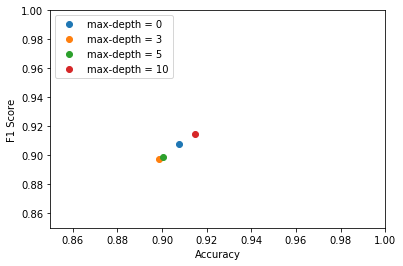

In [62]:
for i, label in zip(range(0, 4), (0, 3, 5, 10)):
    plt.plot(sthree_acc[i], sthree_f1[i], "o", label='max-depth = {}'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.85, 1])
plt.ylim([0.85, 1])
plt.show()

### Arbres de décision - Cross validation

D'après le graphique des Accuracy et F1 scores, on se rend compte que le meilleur hyperparamètre pour les arbres de décision pour Spam est `max-depth = 10.` La Validation croisee sera donce effectuee avec l'hyperparamètre `max-depth = 10.` .

In [63]:
K = 10
for md in [5,10]:
    clf = tree.DecisionTreeClassifier(max_depth = md)
    sthree_CV_scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
    print('max_depth : {0} F1 score: {1}'.format(md,sum(sthree_CV_scores)/K))

max_depth : 5 F1 score: 0.9075956678700361
max_depth : 10 F1 score: 0.9170187069248442


### KNN 
#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [64]:
sKNN_acc_uniform = []
sKNN_f1_uniform = []

sKNN_acc_distance = []
sKNN_f1_distance = []

In [65]:
for n_neigh in (3, 5, 10):
    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='uniform')

    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    sKNN_acc_uniform.append(acc)
    sKNN_f1_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='distance')
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    sKNN_acc_distance.append(acc)
    sKNN_f1_distance.append(f1)

### KNN - Accuracy & F1 Scores

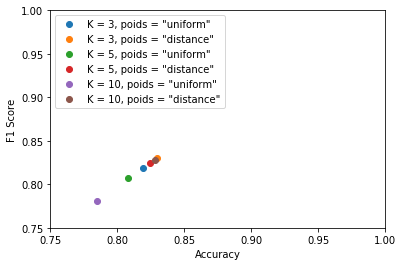

In [66]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(sKNN_acc_uniform[i], sKNN_f1_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(sKNN_acc_distance[i], sKNN_f1_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.75, 1])
plt.ylim([0.75, 1])
plt.show()

### KNN - Cross-validation

D'après le graphique des Accuracy et F1 scores, on se rend compte que le hyperparamètre K pour Spam est `K = 3` La Validation croisee sera donce effectuee avec l'hyperparamètre `K=3` .

In [67]:
K = 10
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
sKNN_scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(sKNN_scores)/K)

0.8029222185756482


### Bayes Naive
#### Distribution Gaussienne

hold out validation

In [68]:
clf = GaussianNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

sgauss_acc = accuracy_score(Ym_test, Y_pred)
sgauss_f1 = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(sgauss_acc))
print("Score F1 : {}".format(sgauss_f1))

Précision : 0.8387681159420289
Score F1 : 0.8402037805334562


validation croisee

In [69]:
K = 10
clf = GaussianNB()
scores = cross_val_score(clf, X_mail, Y_mail, cv=K)
print(sum(scores)/K)

0.8122848703642929


#### Distribution  Multinomiale

validation hold out

In [70]:
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X_mail) 

scaler = preprocessing.MinMaxScaler()
Xm_scaled = scaler.fit_transform(X_mail)

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm_scaled, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

clf = MultinomialNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

smulti_acc = accuracy_score(Ym_test, Y_pred)
smulti_f1 = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(smulti_acc))
print("Score F1 : {}".format(smulti_f1))


Précision : 0.9094202898550725
Score F1 : 0.9076189451243262


Bayes - distribution multionomiale - validation croisee

In [71]:
K = 10
clf = MultinomialNB()
smulti_scores = cross_val_score(clf, Xm_scaled, Y_mail, cv= K)
print(sum(smulti_scores)/K)

0.898148999015425


### forêts aléatoires (random forest)

In [72]:
param_grid = {
    'max_depth': [3,5,10,20,30,40,50,100],
    'n_estimators': [10,20,30,40,50,100,200,300]
}

grid_search = GridSearchCV(estimator =  RandomForestClassifier(), param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(Xm_train, Ym_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 10, 20, 30, 40, 50, 100], 'n_estimators': [10, 20, 30, 40, 50, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [73]:
clf=RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],max_depth=grid_search.best_params_['max_depth'])
clf.fit(Xm_train,Ym_train)
Y_pred = clf.predict(Xm_test)
srandfor_acc = accuracy_score(Ym_test, Y_pred)
srandfor_f1 = f1_score(Ym_test, Y_pred, average='weighted') 
print("Précision : {}".format(srandfor_acc))
print("Score F1 : {}".format(srandfor_f1))

Précision : 0.9492753623188406
Score F1 : 0.9490656870638756


In [74]:
scores = cross_val_score(clf, Xm_test, Ym_test, cv= K)
print(sum(scores)/K)

0.9384370015948962


## Analyse de galaxies

Nous n'avons pas utilisé la recherche par grille pour les données Spam, mais nous allons l'utiliser ici pour définir les meilleurs hyperparamètres pour l'algorithme des K-plus proches voisins. Nous aurions pu l'utiliser dans les cas précédents mais cela ne change rien en terme de résultats purs.

In [75]:
feature_vectors = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)
labels = pd.read_csv('galaxy_label_data_set.csv', delimiter = ',')
X_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,0:-1]
Y_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,-1:].astype(int).flatten()
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_galaxy, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

##### Utilisons les caracteristiques du TP1 dans le vecteur d'entree (qu'est ce qui garanti que l'ordre des observations de galaxy_feature_vectors.csv soit le meme que celles du TP1 ? )

In [76]:
X_galaxy_TP1 = pd.read_csv('vectors_TP1.csv', delimiter = ',').values[:,0:2]
# utilisons uniquement circularite et aspect ratio ratio
X_galaxy_TP1_1= np.concatenate([X_galaxy,X_galaxy_TP1[:,0:2]],axis=1)
Xgtp1_train, Xgtp1_test, Ygtp1_train, Ygtp1_test = train_test_split(X_galaxy_TP1_1, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

Nous observons une incoherennce dans les classes de sortie entre 'galaxy_feature_vectors.csv' et 'galaxy_label_data_set.csv' comme le montre le print ci-dessous :

In [77]:
print(pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)[75].head(6))
print(labels.head(6)) 

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
Name: 75, dtype: float64
       id   class
0  100090  smooth
1  100134  spiral
2  100322  spiral
3  100380  spiral
4  100458  smooth
5  100479  smooth


### KNN 

In [78]:
gKNN_acc_uniform = []
gKNN_f1_uniform = []

gKNN_acc_distance = []
gKNN_f1_distance = []

In [79]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[3, 5, 10]}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters, cv=10)
clf.fit(X_galaxy, Y_galaxy)

print(clf.best_params_)

{'n_neighbors': 10, 'weights': 'distance'}


#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [80]:
for n_neigh in (3, 5, 10):

    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='uniform')

    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    gKNN_acc_uniform.append(acc)
    gKNN_f1_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='distance')
    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    gKNN_acc_distance.append(acc)
    gKNN_f1_distance.append(f1)

#### KNN - Accuracy & F1 Scores

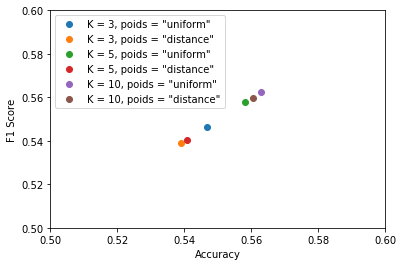

In [81]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(gKNN_acc_uniform[i], gKNN_f1_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(gKNN_acc_distance[i], gKNN_f1_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend(loc='upper left')
plt.xlim([0.5, 0.6])
plt.ylim([0.5, 0.6])
plt.show()

#### KNN - Cross-validation
Nous obtenons de meilleurs résultats lorsque K = 10 et que le poids est uniforme. Nous allons donc faire la validation croisée avec ces hyperparamètres.

In [82]:
nfold = 10
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
gKNN_scores = cross_val_score(clf, X_galaxy, Y_galaxy, cv=nfold)
print (gKNN_scores)
print(sum(gKNN_scores)/nfold)

[0.58865248 0.57446809 0.57362507 0.54405677 0.56771141 0.56002365
 0.5556213  0.58047337 0.5556213  0.57159763]
0.5671851089912532


In [83]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf = clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)
CM = confusion_matrix(Y_pred, Yg_test)

print(classification_report(Y_pred,Yg_test))
print(CM)

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      1811
           1       0.53      0.59      0.56      1571

   micro avg       0.56      0.56      0.56      3382
   macro avg       0.56      0.56      0.56      3382
weighted avg       0.57      0.56      0.56      3382

[[980 831]
 [647 924]]


### Bayes
#### Loi Gaussienne (normale)

In [84]:
clf = GaussianNB()
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

ggauss_acc = accuracy_score(Yg_test, Y_pred)
ggauss_f1 = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(ggauss_acc))
print("Score F1 : {}".format(ggauss_f1))

Précision : 0.797752808988764
Score F1 : 0.797131047668415


#### Loi Multinomiale

In [85]:
scaler = preprocessing.MinMaxScaler()
Xg_scaled = scaler.fit_transform(X_galaxy)
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(Xg_scaled, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

Recherche de l'hyperparametre alpha pour la loi multinomiale

In [86]:
NBParamGrid=dict(alpha=np.linspace(0,2,20)[1:])
paramsearch = GridSearchCV(estimator=MultinomialNB(), param_grid=NBParamGrid, n_jobs=6,cv=10)
paramsearch.fit(Xg_train, Yg_train)
selected_alpha = paramsearch.best_estimator_.alpha
print(selected_alpha)

1.5789473684210527


La meilleure valeur de alpha est 1.578 et sera utilisee par la suite pour la validation

#### Bayes - Loi multinomiale - avec holdout validation

In [87]:
clf = MultinomialNB(alpha=selected_alpha)
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

gmulti_acc = accuracy_score(Yg_test, Y_pred)
gmulti_f1 = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(gmulti_acc))
print("Score F1 : {}".format(gmulti_f1))

Précision : 0.7897693672383205
Score F1 : 0.789556798757904


#### Bayes - Loi multinomiale - avec validation croisee

In [88]:
K = 10
clf = MultinomialNB(alpha=selected_alpha)
scores = cross_val_score(clf, Xg_scaled, Y_galaxy, cv= K)
print(sum(scores)/K)

0.7938833220883036


test de classification pour la loi multinomiale avec les features calculees dans le TP1 en plus

In [89]:
K = 10
clf = MultinomialNB(alpha=selected_alpha)
XgTP1_scaled = scaler.fit_transform(X_galaxy_TP1_1)
gmulti_scores = cross_val_score(clf, XgTP1_scaled, Y_galaxy, cv= K)
print(sum(gmulti_scores)/K)

0.7942978729443076


Lien utile : http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

## Question 1
### Méthode de création des ensembles de données
Nous avons essentiellement utilisé les méthodes de la librairie Scikitlearn pour créer nos ensembles de données. Nous utilisons train_test_split pour entrainer des algorithmes avec des validations en holdout, et cross_val_score pour des entrainements avec K fold cross validation. Cette librairie nous offre des moyens simples d'utilisation pour générer des ensembles de tailles pré-déterminée et mélangés pour simuler des conditions au plus proche d'un cas d'utilisation réelle compte tenu de nos données.

## Question 2
### Approche de validation proposée et justification
Nous avons choisi de pratiquer des K fold cross validations pour valider la totalité de nos apprentissages car nous pensons que c'est le meilleur compromis parmi K flod CV, leave one out, leave P out et holdout. En effet il nous permet de tester suffisamment de cas de figures d'entrainements pour être confiant sur l'apprentissage suffisamment général par rapport à holdout mais sans pour autant être aussi gourmand en ressources que leave one out ou leave P out.

## Question 3
### Matrice des expérimentations


In [93]:
Markdown("""|Données|Pourriels|Galaxies|
|-------|---------|--------|
|Arbre de décision d=3|Acc = {0}, F1 = {1}|None|
|Arbre de décision d=5|Acc = {2}, F1 = {3}|None|
|Arbre de décision d=10|Acc = {4}, F1 = {5}|None|
|Arbre de décision d=None|Acc = {6}, F1 = {7}|None|
|Arbre de décision 10-CV|{8}|None|
|3-NN Uniform|Acc = {9}, F1 = {10}|Acc = {11}, F1 = {12}|
|3-NN Distance|Acc = {13}, F1 = {14}|Acc = {15}, F1 = {16}|
|5-NN Uniform|Acc = {17}, F1 = {18}|Acc = {19}, F1 = {20}|
|5-NN Distance|Acc = {21}, F1 = {22}|Acc = {23}, F1 = {24}|
|10-NN Uniform|Acc = {25}, F1 = {26}|Acc = {27}, F1 = {28}|
|10-NN Distance|Acc = {29}, F1 = {30}|Acc = {31}, F1 = {32}|
|3-NN Distance 10-CV|{33}|{34}|
|Bayes Gaussian|Acc = {35}, F1 = {36}|Acc = {37}, F1 = {38}|
|Bayes Multinomial|Acc = {39}, F1 = {40}|Acc = {41}, F1 = {42}|
|Bayes Multinomial 10-CV|{43}|{44}|
""".format(sthree_acc[1], sthree_f1[1], sthree_acc[2], sthree_f1[2], sthree_acc[3], sthree_f1[3], sthree_acc[0], sthree_f1[0], 
           sum(sthree_CV_scores)/10, sKNN_acc_uniform[0], sKNN_f1_uniform[0], gKNN_acc_uniform[0], gKNN_f1_uniform[0], 
           sKNN_acc_distance[0], sKNN_f1_distance[0], gKNN_acc_distance[0], gKNN_f1_distance[0], 
           sKNN_acc_uniform[1], sKNN_f1_uniform[1], gKNN_acc_uniform[1], gKNN_f1_uniform[1], 
           sKNN_acc_distance[1], sKNN_f1_distance[1], gKNN_acc_distance[1], gKNN_f1_distance[1],
           sKNN_acc_uniform[2], sKNN_f1_uniform[2], gKNN_acc_uniform[2], gKNN_f1_uniform[2], 
           sKNN_acc_distance[2], sKNN_f1_distance[2], gKNN_acc_distance[2], gKNN_f1_distance[2],
           sum(sKNN_scores)/10, sum(gKNN_scores)/nfold,
           sgauss_acc, sgauss_f1, ggauss_acc, ggauss_f1,
           smulti_acc, smulti_f1, gmulti_acc, gmulti_f1,
           sum(smulti_scores)/10, sum(gmulti_scores)/K))

|Données|Pourriels|Galaxies|
|-------|---------|--------|
|Arbre de décision d=3|Acc = 0.8985507246376812, F1 = 0.897740031205263|None|
|Arbre de décision d=5|Acc = 0.9003623188405797, F1 = 0.8990733553257645|None|
|Arbre de décision d=10|Acc = 0.9148550724637681, F1 = 0.9145412111165964|None|
|Arbre de décision d=None|Acc = 0.907608695652174, F1 = 0.9075014092624848|None|
|Arbre de décision 10-CV|0.9170187069248442|None|
|3-NN Uniform|Acc = 0.8188405797101449, F1 = 0.818407660148391|Acc = 0.5467179183914843, F1 = 0.546580009350169|
|3-NN Distance|Acc = 0.8297101449275363, F1 = 0.8297101449275363|Acc = 0.539030159668835, F1 = 0.538831071662403|
|5-NN Uniform|Acc = 0.8079710144927537, F1 = 0.807347603796286|Acc = 0.5582495564754583, F1 = 0.5580209973466429|
|5-NN Distance|Acc = 0.8242753623188406, F1 = 0.8242086503869479|Acc = 0.5408042578356003, F1 = 0.5405746872272853|
|10-NN Uniform|Acc = 0.7844202898550725, F1 = 0.7813752527940205|Acc = 0.5629804849201656, F1 = 0.5625866823342862|
|10-NN Distance|Acc = 0.8278985507246377, F1 = 0.8275590465636746|Acc = 0.560615020697812, F1 = 0.5598099126473268|
|3-NN Distance 10-CV|0.8029222185756482|0.5671851089912532|
|Bayes Gaussian|Acc = 0.8387681159420289, F1 = 0.8402037805334562|Acc = 0.797752808988764, F1 = 0.797131047668415|
|Bayes Multinomial|Acc = 0.9094202898550725, F1 = 0.9076189451243262|Acc = 0.7897693672383205, F1 = 0.789556798757904|
|Bayes Multinomial 10-CV|0.898148999015425|0.7942978729443076|


### Etude des hyperparamètres

#### Arbres de décision  
D'après nos données,ne pas limiter la profondeur de l'abre créee un sur-apprentissage,il est donc préférable de limiter celle-ci.Pour les 3 valeurs testées ,plus la profondeur de l'arbre est élevée, plus la précision et les scores F1 sont élevés.
Le gain d'information et donc la pureté de nos ensembles de données s'améliore en augmentant cette profondeur.Dans le cas des données de spams,Une profondeur de 10 ne semble pas causer de sur-apprentissage et permet d'obtenir les meilleurs résultats avec un F1 score de 0.9185.Cependant avec une prodondeur de 5 le F1 score est assez proche 0.90759 et dependemment de l'application que l'on souhaite mettre en place il faudra prendre en compte la complexité de le l'arbre et une profondeur de 5 semble etre un bon compromis complexité/performance.

#### KNN  
`poids = uniform` veut dire que la pondération de chaque voisin est uniforme et ne dépend pas de la distance au point.
L'option `poids = distance` pondère différement chaque voisin pour la décision de l'algorithme KNN.Cette pondération est inversement proportionnelle a la distance au point a classifier.
La distance utilisee est celle par defaut donc ‘minkowski’ avec p=2 ce qui equivaut a la distance Euclidienne.

Dans le cas des spams, les meilleurs hyperparamètres sont : `nombre de voisins = 3` et `poids = distance`. Nous pouvons expliquer cela par le fait que lorsque k est trop grand,le biais est important et on risque un sous-apprentissage.K=3 semble etre un bon compromis biais/variance sans introduire de sur-apprentissage. La performance de cet algorithme est egalement a prendre en compte car la pondération par distance introduit de la lenteur dans l'exécution O(nd+nk).

De plus, nous pouvons remarquer que lorsque l'hyperparamètre du poids est égal à $distance$, les résultats sont significativement meilleurs. En effet, les voisins les plus proches aideront à mieux discriminer le point étudié.

Dans la Classification des Galaxies et donc des images , K=10 uniforme permet d'obtenir les meilleurs resultats de score F1 (0.567) mais ce modele ne semble pas adapté a ce jeu de données.

#### Bayes 

Deux hypothèses de distributions ont été etudiées dans ce travail ,la loi normale et la distribution  multinomiale.Pour cette dernière,il s'agit d'une généralistion de la loi de Bernouilli (succès de n épreuves) pour des variables de nature catégorielle (discrètes) comme c'est le cas pour le spam ou les galaxies.

L'imppact de l'hyperparamètre alpha a été évalue pour cette distribution pour la classifiaction de galaxies.alpha est un hyperparamètre de lissage pour les variables catégorielles.


Le meilleur résultat pour l'algorithme de Bayes naïf est lorsque celui-ci la distribution est multinomiale, avec les hyperparamètres `MinMaxScaler` et la `K-Bins discretization`.   

D'après la définition de Scikit-learn, `MinMaxScaler` transforme les primitives () en les mettant à l'échelle entre 0 et 1. Cela permet de minimiser les différences d'échelle entre les différents attributs. (Ex : un attribut entre 0 et 1000 et un attribut entre 0 et 1).

`KBinsDiscretizer` permet de discrétiser les attributs continus que nous avons en entrée. Cela permet de réduire les différences entre les différentes valeurs que peut prendre l'attribut, ce qui permet de mieux les regrouper entre eux.

#### forêts aléatoires (random forest)

Les hyperparamètres pour le modele random forest ont été determinés avec une recherche par grille.La profondeur des arbres (max_depth) est un hyperparamètre a considerer ainsi que le nombre d'arbres (n_estimators).La profondeur maximale utilisée est 20 avec 30 arbres.

## Question 4
### Impact de la taille des ensembles de données sur la performance de classification

D'après nos différentes analyses, les ensembles de données qui se démarquent le mieux sont ceux sont les attributs sont discrétisés. En effet, comme expliqué précédemment, cela permet de regrouper un ensemble de valeurs différentes ensemble. Pour ce qui est de la taille des ensembles de données, nous avons beaucoup moins d'exemples pour les spams que pour les galaxies. Cependant, le cas des spams donne des erreurs beaucoup plus faibles que le cas des galaxies. Nous pouvons expliquer cela par le fait que les primitives de Spam sont plus discriminantes que celles des galaxies. Nous pouvons donc déduire de ces exemples que la taille des ensembles des données n'aide pas forcément à une meilleure classification des données. En effet, la qualité des primitives joue un rôle principal dans les classifications. Cependant, lorsque les privitives discriminent bien les données, il est évident qu'un nombre plus important d'exemples d'apprentissage va favoriser une meilleure classification des données.

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification

On sait que les données extraites de l'analyse des images de galaxies sont plus bruitées que celles extraites des courriels. Par conscéquent en testant chaque classifieur avec les mêmes hyperparamètres pour nos deux problématiques de classification.
Etant donné que nous avons déja constaté que les résultats des arbres de classification n'étaient pas très bons, nous pouvons conclure que ce type de classification est très sensible au bruit. D'ailleurs, pour la classification des coourriels, on obtient un score de plus de 90% comparé au 75% pour les galaxies dans le lab précédent.

D'après les observations des résultas de KNN, il semblerait que ce classifieur soit encore plus sensible au bruit que les arbres de classification.

D'un autre côté les classifieurs naïfs guassiens ou multinomiaux semblent mooin sensibles au bruit mais n'améliorent pas la classification d'un ensemble peu bruité comparé aux résultats obtenus dans KNN ou par arbres de décision avec les courriels.

## Question 6
### Discussion sur la nature des données

Les données `Spam` sont extraites de différents mails, qui sont eux même composés d'une série de mots. Les données `Galaxy` sont quant à elles des images. Il est clairement plus difficile d'extraire de bonnes primitives sur des images que sur un texte simple. En effet, il faut tout d'abord effectuer plusieurs pré-traitements sur les images pour pouvoir extraire des données qui ne sont pas complètement sûres, par rapport à un nombre d'enchainement de mots écrits en majuscule dans un texte par exemple.  
C'est pourquoi nous arrivons mieux à classifier les mails en Spam que les différents types de galaxies.

## Question 7
### Recommandations

Après avoir compris nos résultats, nous pensons pouvoir conclure sur des pratiques qui nous semblent pertinentes en fonction des données qui nous sont proposées.
Tout d'abord, lorsque nous avons affaire à des images il semble essentiel de discrétiser les caractéristiques de sorte à réduire l'impact du bruit sur la décision. Cela semble être un traitement qui va dans le sens de la généralisation de l'apprentissage. Les features une fois discrétisées sont dès lors adaptées à des méthodes de classification Bayésiennes telles que des classifieurs Gaussiens ou Multinomiaux.

Pour des données moins bruitées il nous semble qu'aucune technique de classification ne prévale au vu de nos résultats, cependant nous savons que toutes les techniques ne sont pas aussi gourmandes en ressources mémoire ou temps de calcul. Partant de ce constat, les méthodes KNN sont trop gourmandes (et aussi légèrement moins précises) et donc à éviter si possible.

## Question 8
### Améliorations possibles

